# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [15]:
da_female_35_50 = da[(da.RIAGENDR==2) & (da.RIDAGEYR >=35) & (da.RIDAGEYR <=50)]
da_female_35_50.reset_index(inplace = True,drop = True)      #to reset indexes to start from 0 in the edited dataframe
#dz = da_female_35_50[["RIAGENDR","RIDAGEYR"]]
da_married = da_female_35_50[da_female_35_50["DMDMARTL"]==1]
da_notmarried = da_female_35_50[da_female_35_50["DMDMARTL"].isin([2,3,4,5,6])]
len(da_married),len(da_notmarried)

(449, 338)

In [16]:
#Proportion of women who are married and completed college
p1 = len(da_married[da_married["DMDEDUC2"]==5])/len(da_married)
p1

0.36080178173719374

In [17]:
#Proportion of women are not married and completed college
p2 =len(da_notmarried[da_notmarried["DMDEDUC2"]==5])/len(da_notmarried)
p2

0.21301775147928995

In [6]:
#standard errors for married
se_married = np.sqrt((p1 * (1-p1)) / len(da_married))
se_married

0.02266360248455356

In [7]:
#standard errors for not married
se_notmarried = np.sqrt((p2 * (1-p2)) / len(da_notmarried))
se_notmarried

0.022270605048202215

In [8]:
ub_m = p1 + (1.96 * se_married)
lb_m = p1 - (1.96 * se_married)

In [9]:
a = (lb_m,ub_m)
print("Confidence Interval of married proportion : " + str(a))


Confidence Interval of married proportion : (0.3163811208674688, 0.4052224426069187)


In [10]:
ub_nm = p2 + (1.96 * se_notmarried)
lb_nm = p2 - (1.96 * se_notmarried)

In [12]:
a = (lb_nm,ub_nm)
print("Confidence Interval of unmarried proportion : " + str(a))

Confidence Interval of unmarried proportion : (0.1693673655848136, 0.25666813737376626)


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

The confidence interval of married proportion is slightly higher as their standard error is slightly higher as compared to unmarried proportion.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

A higher proportion of women are married have completed college in comparison to the women who are not married.
with 95% confidence we state that 32% to 41% of women who are married have completed college and 17% to 26% of women who are not married have completed college.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [20]:
#Smokers dataframe
da_smoker = da[da["SMQ020"]==1]
da_smoker.reset_index(inplace = True,drop = True)
len(da_smoker)

2319

In [21]:
#proportion of smokers who are female
p1 = len(da_smoker[da_smoker["RIAGENDR"]==2]) / len(da_smoker)
p1

0.3906856403622251

In [22]:
#proportion of smokers who are male
p2 = len(da_smoker[da_smoker["RIAGENDR"]==1])/len(da_smoker)
p2

0.6093143596377749

In [23]:
#standard error for females
se_females = np.sqrt((p1 * (1-p1)) / len(da_smoker[da_smoker["RIAGENDR"]==2]))
se_females

0.016209526631489866

In [24]:
#standard error for males
se_males = np.sqrt((p2 * (1-p2)) / len(da_smoker[da_smoker["RIAGENDR"]==1]))
se_males

0.012979661011895138

In [25]:
#Confidence intervals for females
lb = p1 - (1.96 * se_females)
ub = p1 + (1.96 * se_females)
a = lb,ub
print("95% Confidence interval for smoker females:" + str(a))

95% Confidence interval for smoker females:(0.35891496816450497, 0.4224563125599452)


In [27]:
#Confidence intervals for males
lb = p2 - (1.96 * se_males)
ub = p2 + (1.96 * se_males)
a = lb,ub
print("95% Confidence interval for smoker males:" + str(a))

95% Confidence interval for smoker males:(0.5838742240544604, 0.6347544952210894)


For difference between these proportions 


In [29]:
#Difference standard errors
sd = np.sqrt(se_females**2 + se_males**2)
sd

0.020765845843612775

In [31]:
print(p2-p1)
lb = (p2-p1) - (1.96 * sd)
ub = (p2-p1) + (1.96 * sd)
a = lb,ub
print("95% Confidence interval for difference in proportion is:" + str(a))


0.21862871927554983
95% Confidence interval for difference in proportion is:(0.17792766142206878, 0.2593297771290309)


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

So that now we know that there is a higher proportion of men being smokers than women being smokers.36% to 42% of smokers are women and 58% to 64% of smokers are men(with 95% confidence).
The difference between the gender proportions tells us the proportion of men who are smokers is 22 percentage points higher than
women who are smokers

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

The width of CI of difference of gender proportions is higher than the width of CI of separate proportions of gender.Male smokers are 18% to 26% higher percentage points than women

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [21]:
# enter your code here
#Confidence interval for centimeters
dx = da.BMXHT.dropna()
estimate = dx.mean()
print(estimate)
standard_dev = dx.std()
standard_error = standard_dev / np.sqrt(len(dx))
print(standard_error)

166.1428344791116
0.13382042856478818


In [22]:
lb = estimate - (1.96 * standard_error)
ub = estimate + (1.96 * standard_error)
a = lb,ub
print("95% Confidence interval in centimeters:" + str(a))

95% Confidence interval in centimeters:(165.8805464391246, 166.4051225190986)


In [23]:
#Confidence interval for inches
dx = dx/2.54
estimate = dx.mean()
print(estimate)
standard_dev = dx.std()
standard_error = standard_dev / np.sqrt(len(dx))
print(standard_error)

65.41056475555574
0.05268520809637329


In [24]:
ub = estimate + (1.96 * standard_error)
lb = estimate - (1.96 * standard_error)
a = lb,ub
print("95% Confidence interval in inches:" + str(a))

95% Confidence interval in inches:(65.30730174768685, 65.51382776342463)


In [25]:
lst = np.array(a)
lst = lst * 2.54
b = tuple(lst)
print("95% Confidence intervals back to centimeters:" + str(b))

95% Confidence intervals back to centimeters:(165.8805464391246, 166.40512251909857)


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

The Confidence Interval constructed in Centimeters is wider than CI constructed in Inches

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [26]:
da["agegrp"] = pd.cut(da.RIDAGEYR,[18,28,38,48,58,68,78,88]).dropna()
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"}).dropna()
da.BMXBMI = da.BMXBMI.dropna()
pr = da.groupby(["agegrp","RIAGENDRx"]).agg({"BMXBMI" : [np.mean,np.std,np.size]}).unstack()
pr["BMXBMI","se","Female"] = pr["BMXBMI","std","Female"]/np.sqrt(pr["BMXBMI","size","Female"])
pr["BMXBMI","se","Male"] = pr["BMXBMI","std","Male"]/np.sqrt(pr["BMXBMI","size","Male"])
pr["BMXBMI","mean_diff",""] = pr["BMXBMI","mean","Female"] - pr["BMXBMI","mean","Male"]
pr["BMXBMI","lb",""] = pr["BMXBMI","mean_diff",""] - (1.96 * np.sqrt(pr["BMXBMI","se","Female"]**2 + pr["BMXBMI","se","Male"]**2))
pr["BMXBMI","ub",""] = pr["BMXBMI","mean_diff",""] + (1.96 * np.sqrt(pr["BMXBMI","se","Female"]**2 + pr["BMXBMI","se","Male"]**2))
pr

BMXBMI                                                         \
                mean                  std             size               se   
RIAGENDRx     Female       Male    Female      Male Female   Male    Female   
agegrp                                                                        
(18, 28]   28.019433  27.058186  8.048854  6.679515  498.0  458.0  0.360678   
(28, 38]   29.943443  29.697180  7.959097  6.726690  494.0  467.0  0.358097   
(38, 48]   31.003733  29.514646  8.044642  6.104950  514.0  398.0  0.354834   
(48, 58]   30.787361  29.385132  7.647590  6.151534  454.0  419.0  0.358919   
(58, 68]   31.054664  29.232462  7.779502  5.959024  466.0  470.0  0.360378   
(68, 78]   30.537818  28.720270  6.780588  5.336652  279.0  307.0  0.405943   
(78, 88]   27.850000  27.464368  5.483781  4.695650  201.0  177.0  0.386796   

                                                   
                    mean_diff        lb        ub  
RIAGENDRx      Male                                
agegrp                                             
(18, 28]   0.312113  0.961247  0.026381  1.896114  
(28, 38]   0.311274  0.246263 -0.683705  1.176230  
(38, 48]   0.306014  1.489086  0.570703  2.407470  
(48, 58]   0.300522  1.402230  0.484714  2.319745  
(58, 68]   0.274869  1.822202  0.933853  2.710551  
(68, 78]   0.304579  1.817548  0.822844  2.812252  
(78, 88]   0.352947  0.385632 -0.640672  1.411936

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The CI for most of the age bands are fairly equal except for agegrp 28-38 and 78-88 where 0 also lies in the Interval which means that there is plausible evidence that mean body mass index of genders is same.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [32]:
# enter code here
#CI FOR THE FIRST AND SECOND BLOOD PRESSURES
first = da.BPXSY1
second = da.BPXSY2
first = first.dropna()
second = second.dropna()


In [35]:
#NOW GETTING BOUNDS
LB1,UB1 = sm.stats.DescrStatsW(first).tconfint_mean()
LB2,UB2 = sm.stats.DescrStatsW(second).tconfint_mean()
a = (LB1,UB1)
b = (LB2,UB2)
print("Confidence interval for first Systolic Blood Pressure:" + str(a))
print("Confidence interval for second Systolic Blood Pressure:" + str(b))

Confidence interval for first Systolic Blood Pressure:(124.59163222328895, 125.57759569746646)
Confidence interval for second Systolic Blood Pressure:(124.29482629577244, 125.27120803123749)


In [34]:
#FOR THE DIFFERENCE OF FIRST AND SECOND
diff = first - second
diff = diff.dropna()
LB3,UB3 = sm.stats.DescrStatsW(diff).tconfint_mean()
c = (LB3,UB3)
print("Confidence interval for the difference between blood pressures of a subject:" + str(c))


Confidence interval for the difference between blood pressures of a subject:(0.5399696008802797, 0.8100024609561889)


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

No, zero is not included in the CI 

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

CI for the within-subject difference is considerably SMALL than the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [61]:
da_smoker = da[da.SMQ020==1]["RIDAGEYR"]
da_nonsmoker = da[da.SMQ020==2]["RIDAGEYR"]


In [66]:
print(da_smoker.describe())
print("\n")
print(da_nonsmoker.describe())

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64


count    3406.000000
mean       45.259836
std        18.543286
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64


In [83]:
smoker_age = sm.stats.DescrStatsW(da_smoker)
non_smoker_age = sm.stats.DescrStatsW(da_nonsmoker)

cm = sm.stats.CompareMeans(smoker_age,non_smoker_age)
lower,upper = cm.tconfint_diff(usevar = "pooled")   #as we want mean difference and std are almost same so we use pooled approach
print("Confidence interval is:",lower,upper)
#sm.stats.CompareMeans(smoker_age,non_smoker_age).tconfint_diff(usevar = "pooled")

Confidence interval is: 5.880797225669984 7.792718324216987


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

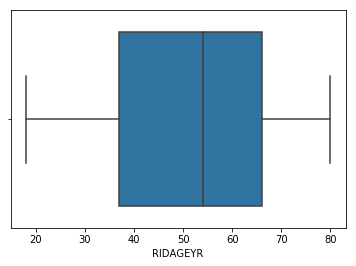

In [77]:
sns.boxplot(da_smoker)

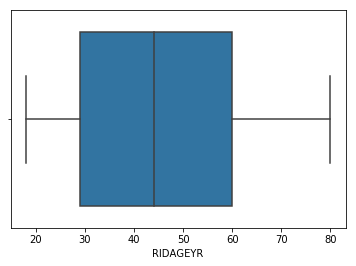

In [79]:
sns.boxplot(da_nonsmoker)

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?